# Downloading MNIST Data from keras API 

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
'''I have separated these two groups as train and test and also separated the labels and the images. x_train and x_test parts contain greyscale RGB codes (from 0 to 255) while y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are. '''

11493376/11490434 [==============================] - 1s 0us/step


# some visualization of labels and thier respective image index 

8


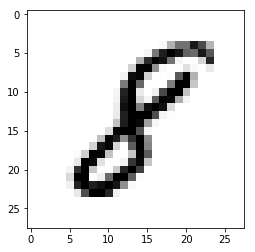

In [3]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

# since as per Hackathon guidelines 60000 for training Dataset and 10000 for Testing

In [4]:
x_train.shape #6000 represent number of images and 28*28 represents pixcels

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 58s 965us/step - loss: 0.2102 - acc: 0.9367
Epoch 2/10
60000/60000 [==============================] - 57s 958us/step - loss: 0.0867 - acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 58s 958us/step - loss: 0.0596 - acc: 0.9807
Epoch 4/10
60000/60000 [==============================] - 56s 936us/step - loss: 0.0452 - acc: 0.9852
Epoch 5/10
60000/60000 [==============================] - 57s 957us/step - loss: 0.0388 - acc: 0.9875
Epoch 6/10
60000/60000 [==============================] - 59s 989us/step - loss: 0.0290 - acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 57s 954us/step - loss: 0.0268 - acc: 0.9908
Epoch 8/10
60000/60000 [==============================] - 56s 936us/step - loss: 0.0221 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 54s 901us/step - loss: 0.0201 - acc: 0.9931
Epoch 10/10
60000/60000 [==============================] - 59s 985us/step - loss: 

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 217us/step


[0.08828121229690769, 0.9828]

NameError: name 'img_rows' is not defined

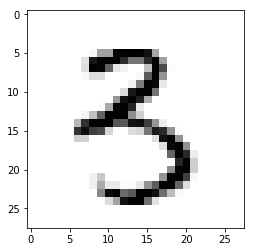

In [12]:
image_index = 5000
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())